# Exploratory Data Analysis - Sports

In [1]:
#Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Total match played, Total Won/Loss, Toss won, Winloss Ratio by each team

In [8]:
team_stats = pd.DataFrame({'Total Match Played' : matches.team1.value_counts() + matches.team2.value_counts(), 'Total Won' : matches.winner.value_counts(), 'Total Loss' : (matches.team1.value_counts() + matches.team2.value_counts())-(matches.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)

In [9]:
winloss = pd.DataFrame({'Winloss Ratio': team_stats['Total Won'] / team_stats['Total Match Played']})
winloss = winloss.round(2)
team_stats = team_stats.join(winloss)
team_stats

,Teams,Total Match Played,Total Won,Total Loss,Winloss Ratio
0,Chennai Super Kings,164,100,64,0.61
1,Deccan Chargers,75,29,46,0.39
2,Delhi Capitals,16,10,6,0.62
3,Delhi Daredevils,161,67,94,0.42
4,Gujarat Lions,30,13,17,0.43
5,Kings XI Punjab,176,82,94,0.47
6,Kochi Tuskers Kerala,14,6,8,0.43
7,Kolkata Knight Riders,178,92,86,0.52
8,Mumbai Indians,187,109,78,0.58
9,Pune Warriors,46,12,34,0.26


## Maximum Toss Won 

Text(0.5, 1.0, 'Maximum Toss Won')

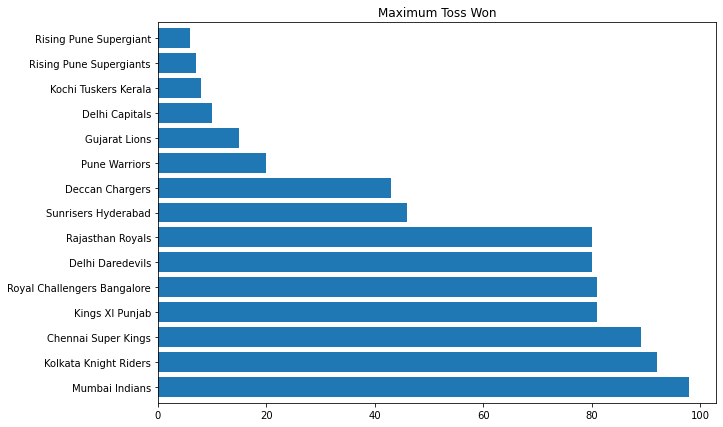

In [10]:
plt.subplots(figsize=(10,7))
ax=matches['toss_winner'].value_counts().plot.barh(width=0.8)
plt.title("Maximum Toss Won")

## Teams who has won the toss, won the match 

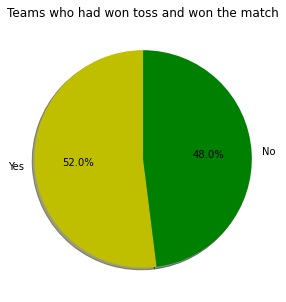

In [13]:
tosswin_matchwin = matches[matches['toss_winner'] == matches['winner']]
slices = [len(tosswin_matchwin),(len(matches)-len(tosswin_matchwin))]
labels = ['Yes','No']
plt.pie(slices, labels = labels, startangle = 90,shadow = True, explode =(0,0),autopct ='%1.1f%%',colors = ['y','g'])
plt.title('Teams who had won toss and won the match')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

In [14]:
# Total Win 

Text(0, 0.5, 'Wins')

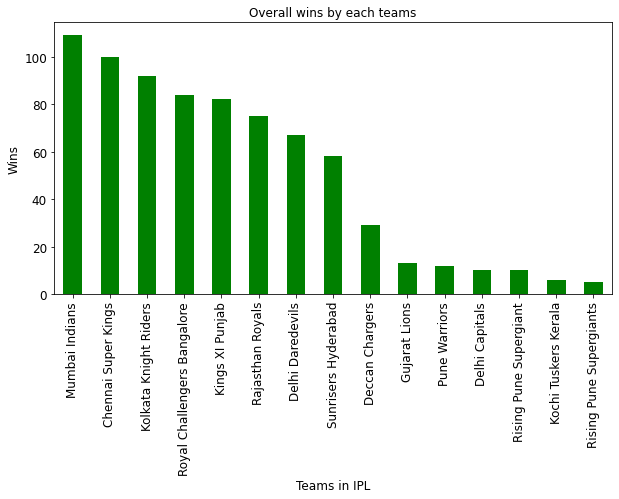

In [17]:
Total_win = matches.winner.value_counts()
ax = Total_win.plot(kind = 'bar',title = 'Overall wins by each teams', figsize = (10,5), fontsize = 12, color ='green')
ax.set_xlabel('Teams in IPL', fontsize = 12)
ax.set_ylabel('Wins',fontsize = 12)


In [20]:
matches["id"].max()

11415

In [23]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [24]:
len(matches['season'].unique())

12

In [25]:
# Winner in each season

In [29]:
winner_each_season = matches.drop_duplicates(subset=['season'],keep ='last')[['season','winner']].reset_index(drop=True)

In [30]:
winner_each_season

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


<AxesSubplot:title={'center':'Most Wins'}>

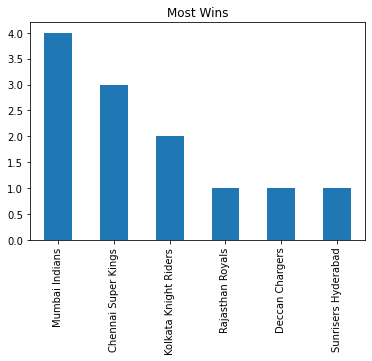

In [32]:
winner_each_season.winner.value_counts().plot(kind = 'bar', title = 'Most Wins' )

<AxesSubplot:xlabel='winner'>

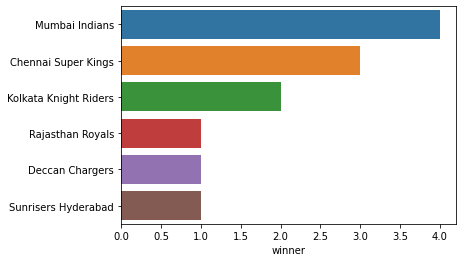

In [33]:
data = winner_each_season.winner.value_counts()
sb.barplot(y=data.index, x=data,orient='h')

### Team Details that won by maximum runs

In [35]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

### Team Winning by maximum runs name

In [36]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

### Team Winning by maximum wickets name

In [37]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [40]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

In [41]:
# Season having most number of matches

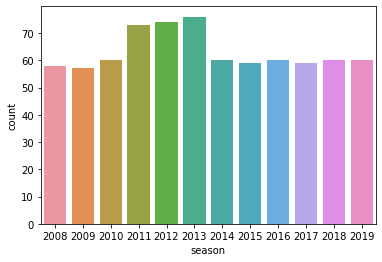

In [42]:
sb.countplot(x='season',data=matches)
plt.show()

# Top Player

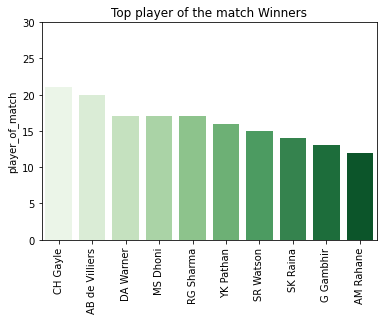

In [47]:
top_player = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,30])
ax.set_ylabel('Count')
ax.set_title('Top player of the match Winners')
top_player.plot.bar()
sb.barplot(x=top_player.index, y=top_player, orient='v',palette='Greens')
plt.show()

## Batsman Overview

In [53]:
batsman = deliveries.groupby("batsman").agg({'ball':'count','batsman_runs':'sum'})
batsman.rename(columns={'ball':'balls','batsman_runs':'runs'}, inplace = True)
batsman = batsman.sort_values(['balls','runs'],ascending =False)
batsman['batting_strike_rate'] = batsman['runs']/batsman['balls'] * 100
batsman['batting_strike_rate'] = batsman['batting_strike_rate'].round(2)
batsman.head(10)

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


In [57]:
Top_batsman = batsman.sort_values(['balls','runs'],ascending =False)[:20]
Top_batsman

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


## Total Runs by each batsman

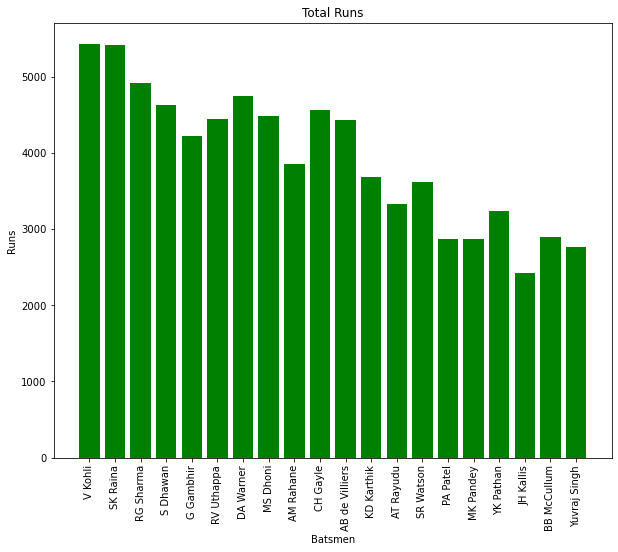

In [59]:
plt.figure(figsize = (10,8))
plt.bar(np.arange(len(Top_batsman)), Top_batsman['runs'], color = 'g')
plt.xticks(ticks = np.arange(len(Top_batsman)), labels = Top_batsman.index, rotation = 90)
plt.xlabel('Batsmen')
plt.ylabel('Runs')
plt.title('Total Runs')
plt.show()

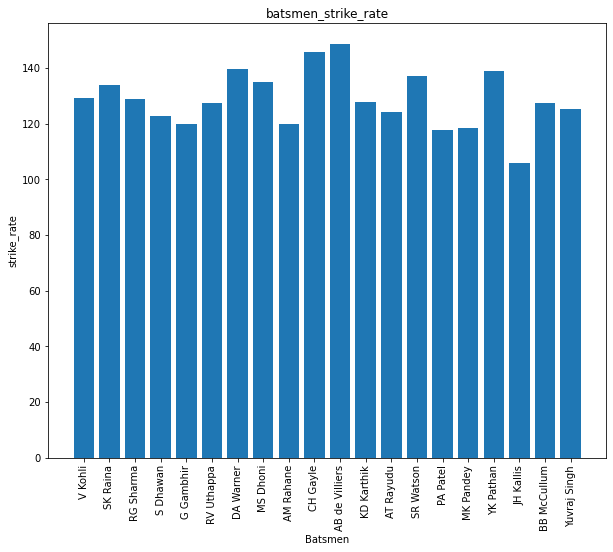

In [64]:
plt.figure(figsize = (10,8))
plt.bar(np.arange(len(Top_batsman)), Top_batsman['batting_strike_rate'])
plt.xticks(ticks = np.arange(len(Top_batsman)), labels = Top_batsman.index, rotation = 90)
plt.xlabel('Batsmen')
plt.ylabel('strike_rate')
plt.title('batsmen_strike_rate')
plt.show()

# Bowler Information

In [68]:
bowler_wickets = deliveries.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum', 'player_dismissed' : 'count'})
bowler_wickets.columns = ['runs','balls','wickets']
TopBowlers = bowler_wickets.sort_values(['wickets'], ascending=False)[:20]
TopBowlers

,runs,balls,wickets
bowler,,,
SL Malinga,2974,3511,188
DJ Bravo,2711,3733,168
A Mishra,3172,3850,165
Harbhajan Singh,3451,4050,161
PP Chawla,3157,4153,156
B Kumar,2707,3264,141
R Ashwin,3016,3391,138
SP Narine,2600,2939,137
UT Yadav,2605,3640,136
